# Data Visualization
Results of the model evaluation.

Read data from Excel.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load data from the Excel file
file_path = 'rankings.xlsx'

# load each sheet into a separate DataFrame
rankings_df = pd.read_excel(file_path, sheet_name='rankings')
precision_df = pd.read_excel(file_path, sheet_name='precision')
negative_df = pd.read_excel(file_path, sheet_name='negative')

In [2]:
rankings_df

,Rank,Custom-GPT,RAG-GPT,Fine-Tuned GPT
0,1,4.000000,7.0,6.000000
1,2,0.000000,4.0,5.000000
2,3,10.000000,3.0,3.000000
3,% of wins,0.285714,0.5,0.428571


In [3]:
precision_df

,Unnamed: 0,Correct,Total,Precision
0,Custom-GPT,6,27,0.222222
1,RAG-GPT,22,35,0.628571
2,Fine-Tuned GPT,14,24,0.583333


In [4]:
negative_df

,Unnamed: 0,Hallucinated Products,Adverse Products
0,Custom-GPT,9,9
1,RAG-GPT,3,3
2,Fine-Tuned GPT,0,2


Plot the percentage of best responses.

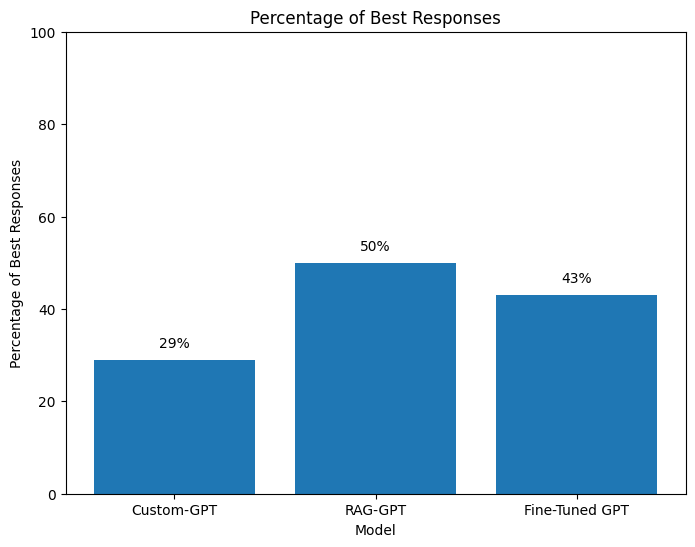

In [30]:
# i) Percentage of Best Responses
models = ['Custom-GPT', 'RAG-GPT', 'Fine-Tuned GPT']
percentage_of_wins = [29, 50, 43]

# Define dark blue color
color = '#1f77b4'

plt.figure(figsize=(8, 6))
bars = plt.bar(models, percentage_of_wins, color=color)
plt.xlabel('Model')
plt.ylabel('Percentage of Best Responses')
plt.title('Percentage of Best Responses')
plt.ylim(0, 100)

# Adding percentages on top of the bars
for bar, percentage in zip(bars, percentage_of_wins):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{percentage}%', ha='center', va='bottom', color='black')

plt.show()

Plot a heatmap of the rankings.

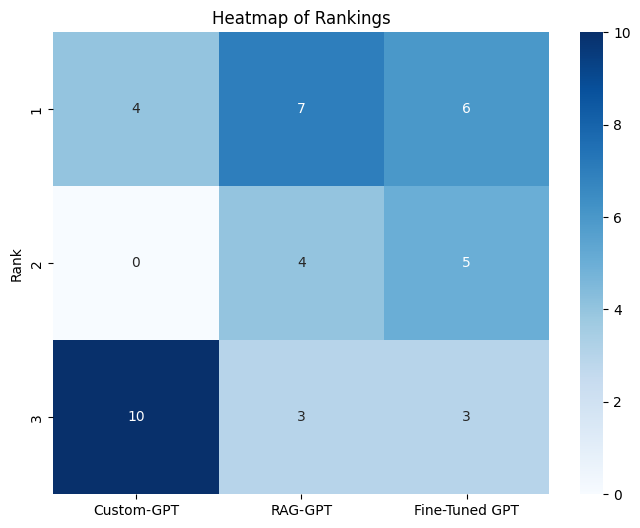

In [20]:
# ii) Heatmap of Rankings
# Exclude the '% of wins' row
rankings_df_filtered = rankings_df.drop(rankings_df[rankings_df['Rank'] == '% of wins'].index)
rankings = rankings_df_filtered.set_index('Rank')

plt.figure(figsize=(8, 6))
sns.heatmap(rankings, annot=True, cmap='Blues', cbar=True)
plt.title('Heatmap of Rankings')
plt.show()

Plot a stacked bar chart for precision.

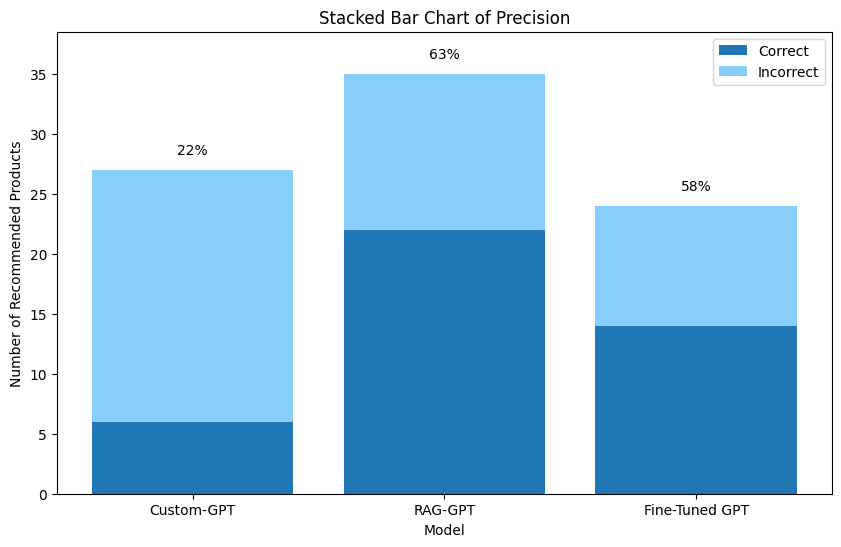

In [29]:
# iii) Stacked Bar Chart of Correct and Total Values with Precision %
correct = precision_df['Correct']
total = precision_df['Total']
precision = precision_df['Precision']

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(models, correct, label='Correct', color='#1f77b4')
bar2 = ax.bar(models, total - correct, bottom=correct, label='Incorrect', color='#87CEFA')

# Extend y-axis range to prevent text overlap
y_max = max(total) * 1.1  # Increase the max value by 10%

for i, (c, t, p) in enumerate(zip(correct, total, precision)):
    ax.text(i, t + 1, f'{p:.0%}', ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Number of Recommended Products')
ax.set_title('Stacked Bar Chart of Precision')
ax.legend()
ax.set_ylim(0, y_max)  # Set the y-axis limit

plt.show()

Plot a grouped bar chart of negative features.

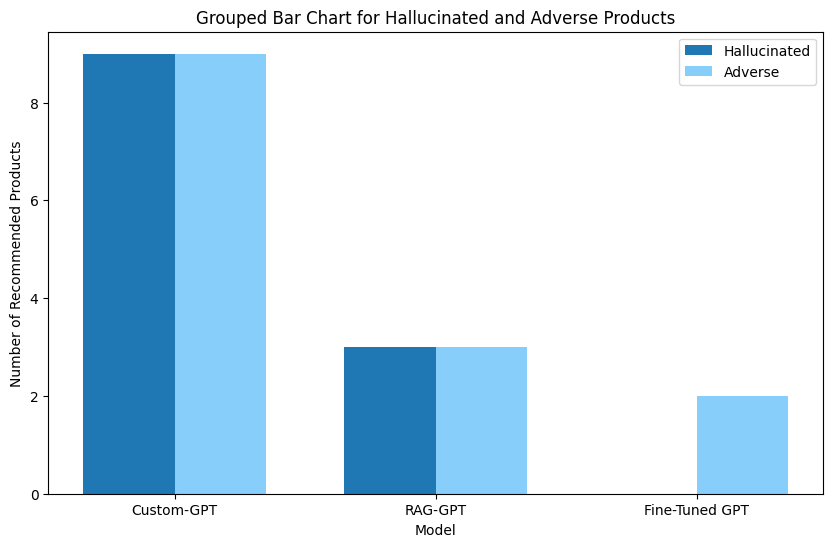

In [31]:
# iv) Grouped Bar Chart for Hallucinated and Adverse Products
hallucinated = negative_df['Hallucinated Products']
adverse = negative_df['Adverse Products']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

bar1 = ax.bar(index, hallucinated, bar_width, label='Hallucinated', color='#1f77b4')
bar2 = ax.bar([i + bar_width for i in index], adverse, bar_width, label='Adverse', color='#87CEFA')

ax.set_xlabel('Model')
ax.set_ylabel('Number of Recommended Products')
ax.set_title('Grouped Bar Chart for Hallucinated and Adverse Products')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()
plt.show()